id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64
mean=1041.146 stdv=4050.637 max=86354
mean=846.575 stdv=672.475 max=10981
Layer Size: (4, 8)
Alpha: 1
R-squared: 0.5763123846083944
RMSE for predictions: 433.0581885806078
RMSE for cross validation: 462.94745503486945


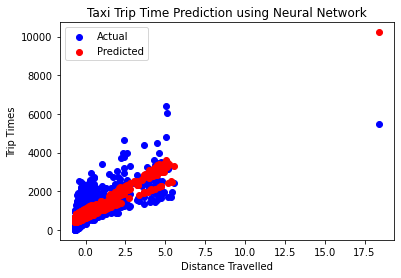

Layer Size: (4, 8)
Alpha: 0.5
R-squared: 0.5763145598306145
RMSE for predictions: 433.0570769136989
RMSE for cross validation: 462.9486564568105


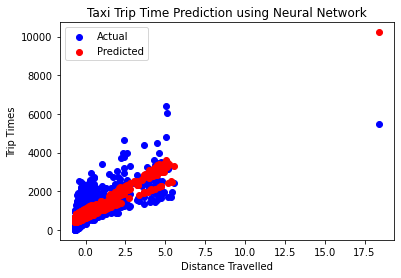

Layer Size: (4, 8)
Alpha: 0.01
R-squared: 0.5763236466106826
RMSE for predictions: 433.05243300203597
RMSE for cross validation: 462.9186460083286


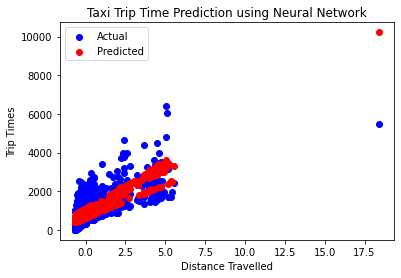

Layer Size: (4, 8)
Alpha: 1e-06
R-squared: 0.576375284916542
RMSE for predictions: 433.02604165964397
RMSE for cross validation: 462.9558884829593


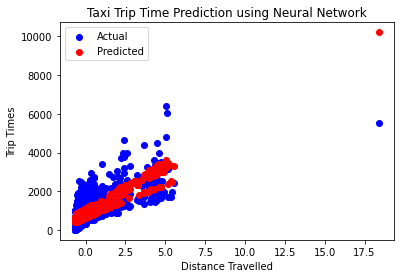

Layer Size: (8, 4)
Alpha: 1
R-squared: 0.6400287006843441
RMSE for predictions: 399.16946139113577
RMSE for cross validation: 426.23104060322584


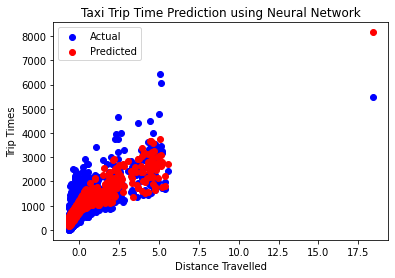

Layer Size: (8, 4)
Alpha: 0.5
R-squared: 0.6220520354613492
RMSE for predictions: 409.0151320402841
RMSE for cross validation: 440.04835527503764


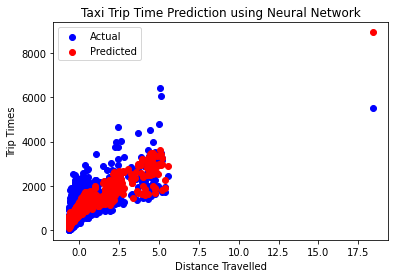

Layer Size: (8, 4)
Alpha: 0.01
R-squared: 0.622278719344517
RMSE for predictions: 408.8924550402196
RMSE for cross validation: 440.21056442778183


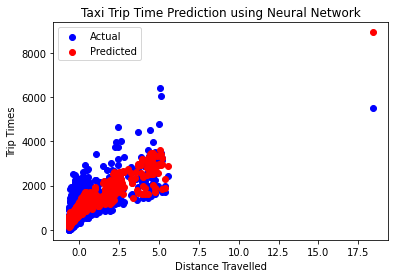

Layer Size: (8, 4)
Alpha: 1e-06
R-squared: 0.5743589489442742
RMSE for predictions: 434.0553601337961
RMSE for cross validation: 462.7023744653689


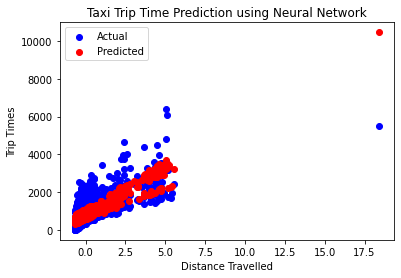

Layer Size: (8, 16)
Alpha: 1
R-squared: 0.6455575674481974
RMSE for predictions: 396.09214003111055
RMSE for cross validation: 428.32369049724434


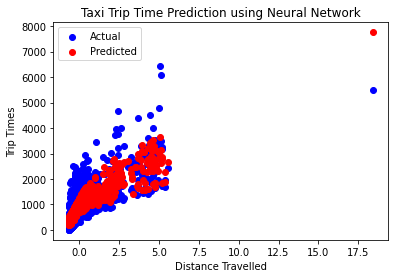

Layer Size: (8, 16)
Alpha: 0.5
R-squared: 0.645352263743713
RMSE for predictions: 396.20683765754995
RMSE for cross validation: 427.7937209144461


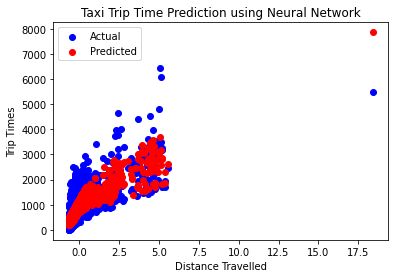

Layer Size: (8, 16)
Alpha: 0.01
R-squared: 0.6455108494623262
RMSE for predictions: 396.11824302497183
RMSE for cross validation: 428.2087167472375


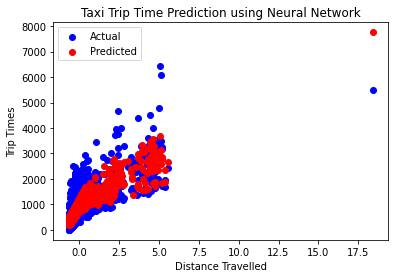

Layer Size: (8, 16)
Alpha: 1e-06
R-squared: 0.6436080007488718
RMSE for predictions: 397.1799740866292
RMSE for cross validation: 428.62146385403145


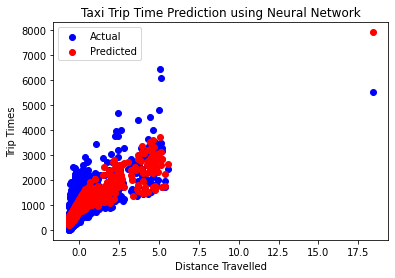

Layer Size: (16, 8)
Alpha: 1
R-squared: 0.6080007247573715
RMSE for predictions: 416.5489098707
RMSE for cross validation: 437.8304027661436


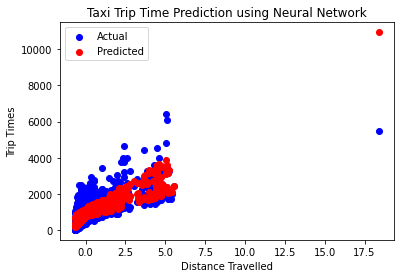

Layer Size: (16, 8)
Alpha: 0.5
R-squared: 0.6064699390779777
RMSE for predictions: 417.36144428615995
RMSE for cross validation: 437.4124751968788


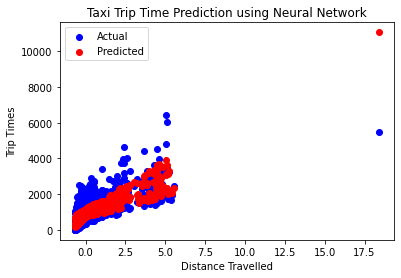

Layer Size: (16, 8)
Alpha: 0.01
R-squared: 0.6057034266525325
RMSE for predictions: 417.76771198439457
RMSE for cross validation: 437.2139868574987


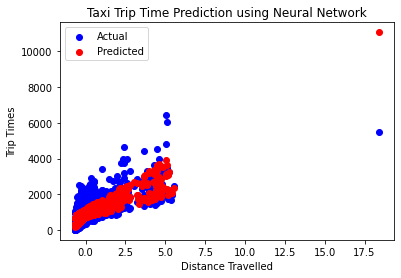

Layer Size: (16, 8)
Alpha: 1e-06
R-squared: 0.6079538537755853
RMSE for predictions: 416.57381230549686
RMSE for cross validation: 437.8724961082555


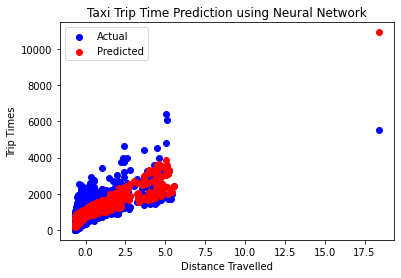

Layer Size: (16, 32)
Alpha: 1
R-squared: 0.642462093629741
RMSE for predictions: 397.8179879896762
RMSE for cross validation: 424.15249594388433


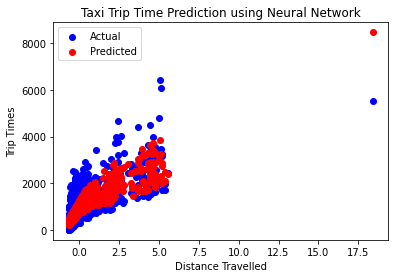

Layer Size: (16, 32)
Alpha: 0.5
R-squared: 0.6419152602786992
RMSE for predictions: 398.12209144893706
RMSE for cross validation: 423.68606505599894


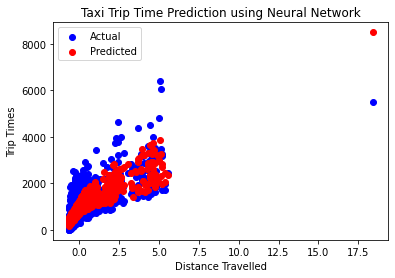

Layer Size: (16, 32)
Alpha: 0.01
R-squared: 0.6421718451457413
RMSE for predictions: 397.979429114655
RMSE for cross validation: 423.95693574874235


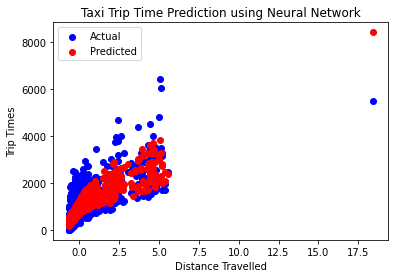

Layer Size: (16, 32)
Alpha: 1e-06
R-squared: 0.6417732917205554
RMSE for predictions: 398.2010046389984
RMSE for cross validation: 424.19265118691743


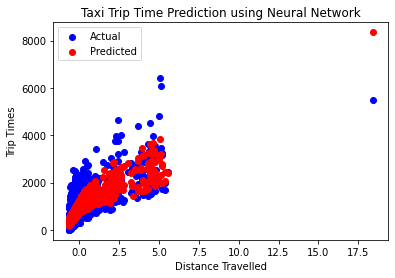

Layer Size: (32, 16)
Alpha: 1
R-squared: 0.6396699250387506
RMSE for predictions: 399.3683336555444
RMSE for cross validation: 422.4406036616008


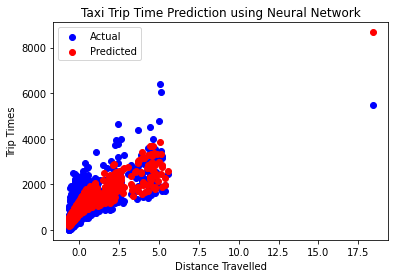

Layer Size: (32, 16)
Alpha: 0.5
R-squared: 0.6398769478258044
RMSE for predictions: 399.2535913261008
RMSE for cross validation: 422.55336305508075


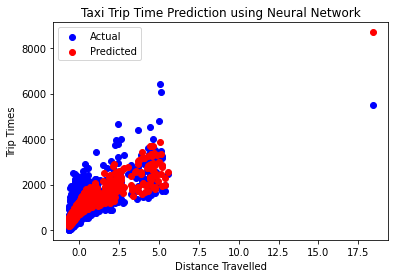

Layer Size: (32, 16)
Alpha: 0.01
R-squared: 0.6401937654927599
RMSE for predictions: 399.0779313360217
RMSE for cross validation: 422.9353710099695


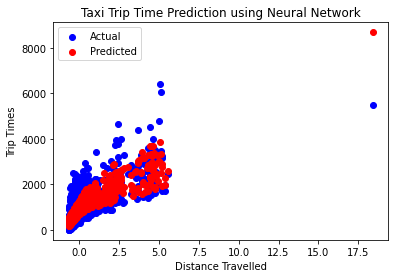

Layer Size: (32, 16)
Alpha: 1e-06
R-squared: 0.6402795132624616
RMSE for predictions: 399.03037507057877
RMSE for cross validation: 422.93437162551976


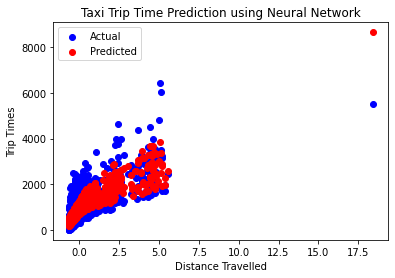

Lowest Prediction Error Achieved: 396.09214003111055 Alpha: 1 Layer Sizes: (8, 16)
Lowest Cross-Validation Error Achieved: 422.4406036616008 Alpha: 1 Layer Sizes: (32, 16)
Highest R Squared Achieved: 0.6455575674481974 Alpha: 1 Layer Sizes: (8, 16)


In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import random
from sklearn.metrics.pairwise import haversine_distances
from math import radians
import datetime
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import math

def getDistance(x1, y1, x2, y2):
    pickup = [float(x1), float(y1)]
    dropoff = [float(x2), float(y2)]
    pickupInRadians = [radians(_) for _ in pickup]
    dropOffInRadians = [radians(_) for _ in dropoff]
    result = haversine_distances([pickupInRadians, dropOffInRadians])
    return result[0][1] * 6371000/1000


def dateTimeToSingleValue(dateTime, valueType):
    date = datetime.datetime.strptime(dateTime, "%Y-%m-%d %H:%M:%S")
    if valueType == 0:
        return date.year
    elif valueType == 1:
        return date.month
    elif valueType == 2:
        return date.day
    elif valueType == 3:
        return date.hour
    elif valueType == 4:
        return date.minute
    else:
        return 'undefined'

def dateTimeToMillis(dateTime):
    return datetime.datetime.strptime(dateTime, "%Y-%m-%d %H:%M:%S").timestamp() * 1000

def timeToPeriod(inputTime):
    val = int(inputTime)
    if val >= 0 and val < 6:
        return 'overnight'
    elif val >= 6 and val < 12:
        return 'morning'
    elif val >= 12 and val < 18:
        return 'afternoon'
    elif val >= 18 and val <= 24:
        return 'evening'
    else:
        return 'undefined'

def weekdayOrWeekend(datetimeToCheck):
    dayNum = datetime.datetime.strptime(datetimeToCheck, "%Y-%m-%d %H:%M:%S").weekday()
    if dayNum < 5:
        return 'weekday'
    elif dayNum == 5 or dayNum == 6:
        return 'weekend'
    else:
        return 'undefined'

def monthToSeason(monthToCheck):
    val = int(monthToCheck)

    if val == 12 or val == 1 or val == 2:
        return 'winter'
    elif val > 2 and val <= 5:
        return 'spring'
    elif val > 5 and val <= 8:
        return 'summer'
    elif val > 8 and val <= 11:
        return 'fall'
    else:
        return 'undefined'

data_df = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/luke.couture@ucalgary.ca/train.csv").toPandas()
data = data_df.sample(10000, replace=False)

# Check number of Nulls
print(data.isnull().sum(axis = 0))

data['distance_travelled'] = data.apply(lambda x: getDistance(x['pickup_longitude'], x['pickup_latitude'], x['dropoff_longitude'], x['dropoff_latitude']), axis=1)
data['pickup_year'] = data.apply(lambda x: dateTimeToSingleValue(x['pickup_datetime'], valueType=0), axis=1)
data['pickup_month'] = data.apply(lambda x: dateTimeToSingleValue(x['pickup_datetime'], valueType=1), axis=1)
data['pickup_day'] = data.apply(lambda x: dateTimeToSingleValue(x['pickup_datetime'], valueType=2), axis=1)
data['pickup_hour'] = data.apply(lambda x: dateTimeToSingleValue(x['pickup_datetime'], valueType=3), axis=1)
data['pickup_period'] = data['pickup_hour'].map(timeToPeriod)
data['pickup_day_type'] = data['pickup_datetime'].map(weekdayOrWeekend)
data['pickup_season'] = data['pickup_month'].map(monthToSeason)

# Detect and remove outliers based on trip durations greater than: mean + (3.1 * sd)
print('mean=%.3f stdv=%.3f max=%d' % (np.mean(data['trip_duration'].astype(int)), np.std(data['trip_duration'].astype(int)), np.max(data['trip_duration'].astype(int))))
sd_y = np.std(data['trip_duration'].astype(int))
mean_y = np.mean(data['trip_duration'].astype(int))
outlier_value = mean_y + (3.1 * sd_y)
data.drop(data[(data.trip_duration.astype(int) > outlier_value) | (data.trip_duration.astype(int) < 0)].index, inplace=True)
print('mean=%.3f stdv=%.3f max=%d' % (np.mean(data['trip_duration'].astype(int)), np.std(data['trip_duration'].astype(int)), np.max(data['trip_duration'].astype(int))))

category_column_names = [
                'vendor_id',
                'pickup_period',
                'pickup_day_type',
                'pickup_season'
                ]

number_column_names = [
                'passenger_count',
                'distance_travelled'
                ]

# copy category columns, create dummy vars, copy number columns, join both
df = data[category_column_names].copy()
category_columns_df = pd.get_dummies(df, columns=category_column_names, drop_first=True)
number_columns_df = data.loc[:,number_column_names].fillna(0)
joined_df = category_columns_df.join(number_columns_df)

# display(joined_df)

X = joined_df
y = data['trip_duration'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

layer_sizes = [(4, 8), (8, 4), (8, 16), (16, 8), (16, 32), (32, 16)]
alphas = [1, 0.5, 0.01, 1e-06]

# contains (lowest/highest value, alpha, layers)
highestRSquared = (0, 0, (0, 0))
lowestPredError = (1000, 0, (0, 0))
lowestCrossValError = (1000, 0, (0, 0))

for layers in layer_sizes:
    for a in alphas:
        # NN regression
        regr = MLPRegressor(alpha=a, max_iter=10000, hidden_layer_sizes=layers, random_state=1)

        # Train the model on the training data
        regr.fit(X_train, y_train)
        
        # Make predictions on the test data
        y_pred = regr.predict(X_test)
        y_cross_validate = regr.predict(X_train)

        print(f'Layer Size: ({layers[0]}, {layers[1]})')
        print(f'Alpha: {a}')

        # R Squared
        r_sq = r2_score(y_test, y_pred)
        print(f'R-squared: {r_sq}')

        # MSE
        rmse_pred = math.sqrt(mean_squared_error(y_test, y_pred))
        rmse_cv = math.sqrt(mean_squared_error(y_train, y_cross_validate))
        print(f'RMSE for predictions: {rmse_pred}')
        print(f'RMSE for cross validation: {rmse_cv}')

        if r_sq > highestRSquared[0]:
            highestRSquared = (r_sq, a, layers)

        if rmse_pred < lowestPredError[0]:
            lowestPredError = (rmse_pred, a, layers)

        if rmse_cv < lowestCrossValError[0]:
            lowestCrossValError = (rmse_cv, a, layers)

        # Visualize the test predictions for the distance_travlled
        plt.scatter(X_test[:, -1], y_test, color='blue', label='Actual')
        plt.scatter(X_test[:, -1], y_pred, color='red', label='Predicted')
        plt.xlabel('Distance Travelled')
        plt.ylabel('Trip Times')
        plt.title('Taxi Trip Time Prediction using Neural Network')
        plt.legend()
        plt.show()

print(f'Lowest Prediction Error Achieved: {lowestPredError[0]} Alpha: {lowestPredError[1]} Layer Sizes: {lowestPredError[2]}')
print(f'Lowest Cross-Validation Error Achieved: {lowestCrossValError[0]} Alpha: {lowestCrossValError[1]} Layer Sizes: {lowestCrossValError[2]}')
print(f'Highest R Squared Achieved: {highestRSquared[0]} Alpha: {highestRSquared[1]} Layer Sizes: {highestRSquared[2]}')